In [1]:
import pandas as pd #Análise de dados Tabulares
import math #Operações Matemáticas
import matplotlib.pyplot as plt #Plot de gráficos
import numpy as np  #Operações com vetores e matrizes
from scipy.stats import norm #Distribuições estatísticas

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CAD.xlsx', index_col=0)

In [3]:
df.head()

,mun,uf,regiao,idh00,espvi00,fect00,mort00,estudo00,idh91,espvi91,fect91,mort91,estudo91
codmun,,,,,,,,,,,,,
5000203,ÁGUA CLARA,50,Centr,0.534,71.27,2.92,22.06,8.03,0.353,67.56,3.99,31.82,5.75
5000252,ALCINÓPOLIS,50,Centr,0.536,71.47,2.92,21.55,8.29,0.295,66.34,3.89,35.75,4.52
5000609,AMAMBAI,50,Centr,0.576,71.02,2.80,22.73,8.55,0.447,67.21,3.50,32.89,7.49
5000708,ANASTÁCIO,50,Centr,0.517,68.07,2.83,31.26,8.59,0.362,64.08,3.41,43.72,8.04
5000807,ANAURILÂNDIA,50,Centr,0.516,69.22,2.36,27.76,8.24,0.359,64.28,3.21,42.99,6.28


In [4]:
import seaborn as sns

<Axes: xlabel='idh91', ylabel='idh00'>

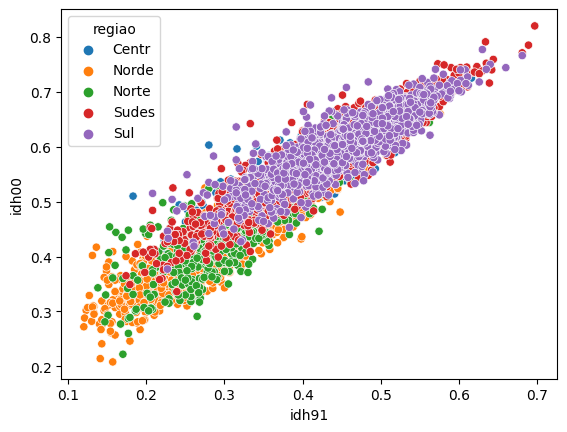

In [5]:
sns.scatterplot(data=df, x="idh91", y="idh00",  hue="regiao")

<Axes: xlabel='espvi00', ylabel='idh00'>

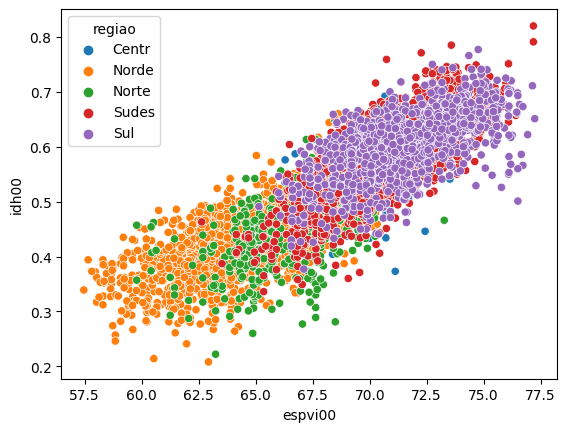

In [6]:
sns.scatterplot(data=df, x="espvi00", y="idh00", hue="regiao")

In [7]:
# creation of correlation matrix
corrM = df.drop('uf', axis=1).corr()

<ipython-input-7-8d89879cd17c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df.drop('uf', axis=1).corr()


In [8]:
display(corrM)

,idh00,espvi00,fect00,mort00,estudo00,idh91,espvi91,fect91,mort91,estudo91
idh00,1.000000,0.870046,-0.696317,-0.847194,0.883143,0.942990,0.848504,-0.794826,-0.823908,0.849898
espvi00,0.870046,1.000000,-0.592610,-0.941476,0.757509,0.808247,0.936904,-0.720490,-0.919536,0.764387
fect00,-0.696317,-0.592610,1.000000,0.576541,-0.654611,-0.659799,-0.573875,0.839584,0.561013,-0.601087
mort00,-0.847194,-0.941476,0.576541,1.000000,-0.745622,-0.775803,-0.910370,0.714569,0.924982,-0.747786
estudo00,0.883143,0.757509,-0.654611,-0.745622,1.000000,0.800982,0.747163,-0.736837,-0.730137,0.814299
idh91,0.942990,0.808247,-0.659799,-0.775803,0.800982,1.000000,0.801609,-0.757858,-0.765392,0.840026
espvi91,0.848504,0.936904,-0.573875,-0.910370,0.747163,0.801609,1.000000,-0.710999,-0.971931,0.763963
fect91,-0.794826,-0.720490,0.839584,0.714569,-0.736837,-0.757858,-0.710999,1.000000,0.709777,-0.709138
mort91,-0.823908,-0.919536,0.561013,0.924982,-0.730137,-0.765392,-0.971931,0.709777,1.000000,-0.747604
estudo91,0.849898,0.764387,-0.601087,-0.747786,0.814299,0.840026,0.763963,-0.709138,-0.747604,1.000000


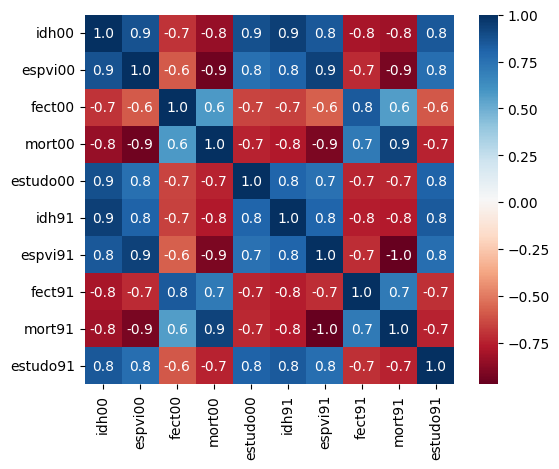

In [9]:
# plotar um heatmap a partir das correlações
sns.heatmap(corrM, cmap='RdBu', fmt='.1f', square=True, linecolor='white', annot=True);

## Bernoulli Sample

In [10]:
round(df.idh00.mean(), 3)

0.523

In [ ]:
lambdai = 1

In [ ]:
s = np.random.poisson(lambdai, 10000)

In [19]:
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/RESP.xlsx', index_col=0)

In [ ]:
df2.head()

,mun,uf,regiao,idh10,espvi10,fect10,mort10,estudo10
codmun,,,,,,,,
5000203,ÁGUA CLARA,50,Centr,0.670,74.40,2.45,18.8,8.94
5000252,ALCINÓPOLIS,50,Centr,0.711,76.46,2.57,15.3,9.93
5000609,AMAMBAI,50,Centr,0.673,74.07,2.43,19.4,8.87
5000708,ANASTÁCIO,50,Centr,0.663,72.33,2.29,22.8,10.12
5000807,ANAURILÂNDIA,50,Centr,0.670,74.58,2.19,18.5,9.31


<Axes: xlabel='idh00', ylabel='idh10'>

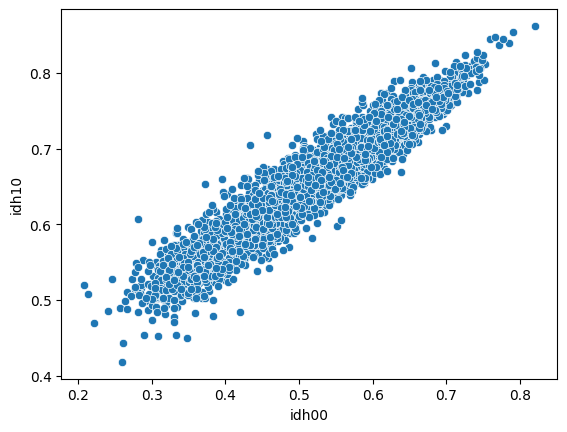

In [ ]:
sns.scatterplot(x= df.idh00, y=df2.idh10)

# Poisson

In [11]:
# 1. Gera um número aleatório (probabilidade uniforme) para cada linha do DataFrame
uniform_numbers = np.random.uniform(0, 1, df.shape[0])

In [12]:
colunas = ['idh00', 'espvi00', 'fect00', 'mort00','estudo00', 'idh91', 'espvi91', 'fect91', 'mort91', 'estudo91']

In [13]:
for i in colunas:
  df['lambda' + '_' + i] = df[i] / df.groupby('regiao')[i].transform('sum')

In [14]:
df.head()

,mun,uf,regiao,idh00,espvi00,fect00,mort00,estudo00,idh91,espvi91,...,lambda_idh00,lambda_espvi00,lambda_fect00,lambda_mort00,lambda_estudo00,lambda_idh91,lambda_espvi91,lambda_fect91,lambda_mort91,lambda_estudo91
codmun,,,,,,,,,,,,,,,,,,,,,
5000203,ÁGUA CLARA,50,Centr,0.534,71.27,2.92,22.06,8.03,0.353,67.56,...,0.002079,0.002184,0.002339,0.001783,0.001993,0.001879,0.002229,0.002628,0.002171,0.001629
5000252,ALCINÓPOLIS,50,Centr,0.536,71.47,2.92,21.55,8.29,0.295,66.34,...,0.002087,0.002191,0.002339,0.001742,0.002058,0.001570,0.002188,0.002562,0.002439,0.001281
5000609,AMAMBAI,50,Centr,0.576,71.02,2.80,22.73,8.55,0.447,67.21,...,0.002243,0.002177,0.002243,0.001838,0.002122,0.002379,0.002217,0.002305,0.002244,0.002122
5000708,ANASTÁCIO,50,Centr,0.517,68.07,2.83,31.26,8.59,0.362,64.08,...,0.002013,0.002086,0.002267,0.002527,0.002132,0.001926,0.002114,0.002246,0.002983,0.002278
5000807,ANAURILÂNDIA,50,Centr,0.516,69.22,2.36,27.76,8.24,0.359,64.28,...,0.002009,0.002122,0.001891,0.002244,0.002045,0.001910,0.002120,0.002114,0.002933,0.001779


In [15]:
# Lista de colunas padronizadas
padronizadas_colunas = ['lambda_' + i for i in colunas]

# Cria uma nova coluna que é o máximo de cada linha nas colunas padronizadas
df['max_lambda'] = df[padronizadas_colunas].max(axis=1)

In [16]:
df.drop(padronizadas_colunas, axis=1, inplace=True)

In [17]:
df.head()

,mun,uf,regiao,idh00,espvi00,fect00,mort00,estudo00,idh91,espvi91,fect91,mort91,estudo91,max_lambda
codmun,,,,,,,,,,,,,,
5000203,ÁGUA CLARA,50,Centr,0.534,71.27,2.92,22.06,8.03,0.353,67.56,3.99,31.82,5.75,0.002628
5000252,ALCINÓPOLIS,50,Centr,0.536,71.47,2.92,21.55,8.29,0.295,66.34,3.89,35.75,4.52,0.002562
5000609,AMAMBAI,50,Centr,0.576,71.02,2.80,22.73,8.55,0.447,67.21,3.50,32.89,7.49,0.002379
5000708,ANASTÁCIO,50,Centr,0.517,68.07,2.83,31.26,8.59,0.362,64.08,3.41,43.72,8.04,0.002983
5000807,ANAURILÂNDIA,50,Centr,0.516,69.22,2.36,27.76,8.24,0.359,64.28,3.21,42.99,6.28,0.002933


In [20]:
# Calcular a quantidade de amostras por estrato
df2['stratum_count'] = df2.groupby('regiao')['regiao'].transform('count')
df2['sampling_prob'] = df['max_lambda'] / df2['stratum_count']

# Normalizar a probabilidade de amostragem para que a soma seja 1
#df2['sampling_prob'] /= df2['sampling_prob'].sum()

In [21]:
# Fazer a amostragem
sample = df2.sample(n=100, replace=False, weights='sampling_prob', random_state=42)

In [22]:
sample.head()

,mun,uf,regiao,idh10,espvi10,fect10,mort10,estudo10,stratum_count,sampling_prob
codmun,,,,,,,,,,
2516607,TAVARES,25,Norde,0.586,71.59,1.88,22.8,8.79,1794,4.920879e-07
4300851,ARAMBARÉ,43,Sul,0.691,74.98,2.28,12.8,9.96,1188,8.367899e-07
1715150,NOVO ALEGRE,17,Norte,0.699,73.72,1.84,16.8,11.04,449,6.990284e-06
1505064,NOVO REPARTIMENTO,15,Norte,0.537,69.48,3.22,28.5,6.82,449,6.107432e-06
5108808,NOVA GUARITA,51,Centr,0.688,73.72,1.93,17.4,9.40,466,5.739079e-06


In [42]:
round(sample.idh10.mean(),3)

0.661

In [24]:
sample.regiao.value_counts()

Centr    39
Norte    35
Sul      11
Sudes     8
Norde     7
Name: regiao, dtype: int64

In [40]:
from scipy import stats

data = sample['idh10']

# média e desvio-padrão da amostra
mean = np.mean(data)
std_err = stats.sem(data)

# graus de liberdade
N = len(data) - 1

# nível de confiança
confidence = 0.95

# calcular o intervalo de confiança
ci = stats.t.interval(confidence, N, mean, std_err)
ci = [round(i,3) for i in ci]
print(f'O intervalo de confiança de {confidence*100}% é:', ci)

O intervalo de confiança de 95.0% é: [0.646, 0.675]


In [41]:
# Calcular o tamanho do intervalo de confiança
ic_tamanho = round(ci[1] - ci[0],3)
print('Tamanho do Intervalo de Confiança:', ic_tamanho)

# Verificar se um número está dentro do intervalo de confiança
numero = round(df2.idh10.mean(),3)

if ci[0] <= numero <= ci[1]:
    print('O número', numero, 'está dentro do Intervalo de Confiança.')
else:
    print('O número', numero, 'não está dentro do Intervalo de Confiança.')

Tamanho do Intervalo de Confiança: 0.029
O número 0.659 está dentro do Intervalo de Confiança.


In [ ]:
df['A'] = df['lambdai']/uniform_numbers

In [ ]:
df.head()

,mun,uf,regiao,idh00,espvi00,fect00,mort00,estudo00,idh91,espvi91,fect91,mort91,estudo91,lambdai,A
codmun,,,,,,,,,,,,,,,
5000203,ÁGUA CLARA,50,Centr,0.534,71.27,2.92,22.06,8.03,0.353,67.56,3.99,31.82,5.75,0.002079,0.003644
5209200,GUAPÓ,52,Centr,0.538,69.54,2.61,28.00,7.88,0.454,64.47,3.02,30.22,7.92,0.002095,0.006932
5209150,GOUVELÂNDIA,52,Centr,0.545,72.25,2.25,22.10,9.13,0.380,65.92,2.75,26.31,6.66,0.002122,0.156647
5209101,GOIATUBA,52,Centr,0.628,73.52,2.20,19.70,9.11,0.490,68.40,2.66,20.36,8.81,0.002445,0.004378
5208905,GOIÁS,52,Centr,0.563,70.56,2.46,25.70,8.70,0.441,63.73,2.72,32.40,7.39,0.002192,0.011849


In [ ]:
df.regiao.value_counts()/ df.regiao.value_counts().values.sum()

Norde    0.322372
Sudes    0.299730
Sul      0.213477
Centr    0.083738
Norte    0.080683
Name: regiao, dtype: float64

In [ ]:
proporcoes = round(df.regiao.value_counts() / df.regiao.value_counts().values.sum(),4).to_dict()

In [ ]:
proporcoes

{'Norde': 0.3224,
 'Sudes': 0.2997,
 'Sul': 0.2135,
 'Centr': 0.0837,
 'Norte': 0.0807}

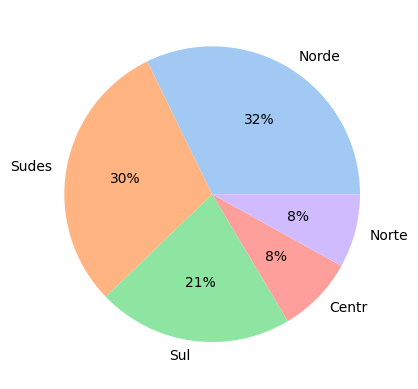

In [ ]:
#define data
data = df.regiao.value_counts().values
labels = df.regiao.value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
n = 100  # Tamanho total da amostra

amostras = pd.DataFrame()  # Cria um novo DataFrame vazio para armazenar as amostras

# Para cada região, pega uma amostra do tamanho indicado
for regiao, proporcao in proporcoes.items():
    df_regiao = df[df['regiao'] == regiao]  # Filtra o DataFrame para a região atual
    tamanho_amostra = int(round(n * proporcao, 0))  # Calcula o número de amostras para a região atual
    amostra = df_regiao.nlargest(tamanho_amostra, 'A')  # Seleciona uma amostra dos maiores valores de 'A'
    amostras = pd.concat([amostras, amostra])  # Adiciona a amostra ao DataFrame de amostras

In [ ]:
  amostras

,mun,uf,regiao,idh00,espvi00,fect00,mort00,estudo00,idh91,espvi91,fect91,mort91,estudo91,lambdai,A
codmun,,,,,,,,,,,,,,,
2707701,RIO LARGO,27,Norde,0.505,67.76,2.95,34.16,7.06,0.389,60.65,4.01,60.63,7.35,0.000667,0.872904
2514602,SÃO JOSÉ DO BONFIM,25,Norde,0.401,60.14,2.47,60.91,7.02,0.262,52.42,4.27,108.94,5.84,0.000529,0.156666
2503753,CAJAZEIRINHAS,25,Norde,0.357,64.36,2.24,44.55,4.73,0.160,57.18,4.22,81.15,1.97,0.000471,0.149389
2918704,LAFAIETE COUTINHO,29,Norde,0.395,63.09,2.90,49.16,3.71,0.255,61.22,4.18,62.66,6.05,0.000522,0.100075
2111672,SÃO ROBERTO,21,Norde,0.285,62.01,3.83,53.30,2.89,0.198,54.29,5.12,102.71,3.95,0.000376,0.078087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301308,CODAJÁS,13,Norte,0.440,64.68,4.63,48.50,5.02,0.355,58.79,7.42,68.95,6.10,0.002209,0.268083
1715507,OLIVEIRA DE FÁTIMA,17,Norte,0.496,65.11,2.86,43.29,6.55,0.340,58.54,3.57,70.12,5.10,0.002490,0.212350
1702703,AURORA DO TOCANTINS,17,Norte,0.486,65.70,3.17,41.23,7.82,0.355,60.28,4.85,62.27,7.37,0.002440,0.186161


In [ ]:
n = 100  # Tamanho total da amostra

# Para cada região, calcula o número de amostras a serem retiradas
amostras_por_regiao = {}
for regiao, proporcao in proporcoes.items():
    amostras_por_regiao[regiao] = round(n * proporcao)

# Imprime o número de amostras por região
for regiao, amostras in amostras_por_regiao.items():
    print(f"{regiao}: {amostras} amostras")

Sudes: 30 amostras
Norde: 32 amostras
Norte: 8 amostras
Centr: 8 amostras
Sul: 21 amostras
